In [3]:
import numpy as np
from keras.datasets import imdb

2023-09-16 16:54:07.234930: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 16:54:07.578960: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 16:54:07.582807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 16:54:08.904404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

In [7]:
len(train_data[3])

550

In [14]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 2s 1us/step


In [29]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [72]:
def transcribe_word (index):
    
    print(
        " ".join([reverse_word_index.get(value-3, "?") for value in train_data[index]])
    )

In [74]:
transcribe_word(0)

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


In [5]:
def one_hot_encode (vector, dimension=10000):
    
    result = np.zeros((len(vector), dimension))
    
    for i, sequence in enumerate(vector):
        
        result[i, sequence] = 1
    return result

In [6]:
x_train = one_hot_encode(train_data)

In [7]:
x_test = one_hot_encode(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models, layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(1000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-09-16 16:54:58.805793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
x = x_train[1000:]
x_dev = x_train[:1000]
y = y_train[1000:]
y_dev = y_train[:1000]

In [1]:
history = model.fit(
    x,y,epochs=20, batch_size=512, validation_data=(x_dev, y_dev)
)

NameError: name 'model' is not defined

In [56]:
import matplotlib.pyplot as plt

In [67]:
history_dict = history.history
val_loss = history_dict["val_loss"]
loss = history_dict["loss"]

epochs = range(1, len(loss) + 1)


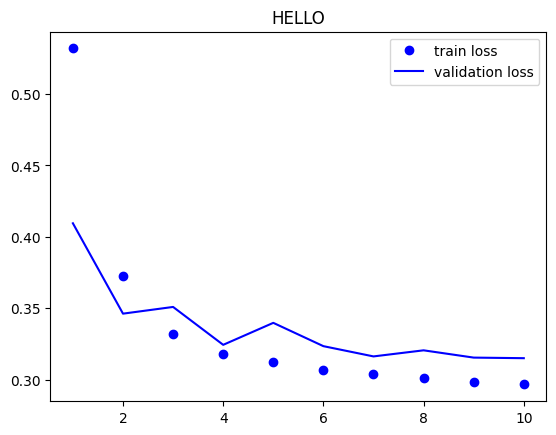

In [61]:
plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')

plt.title("HELLO")

plt.xlabel = 'epochs'
plt.ylabel = 'loss'

plt.legend()

plt.show()

In [64]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

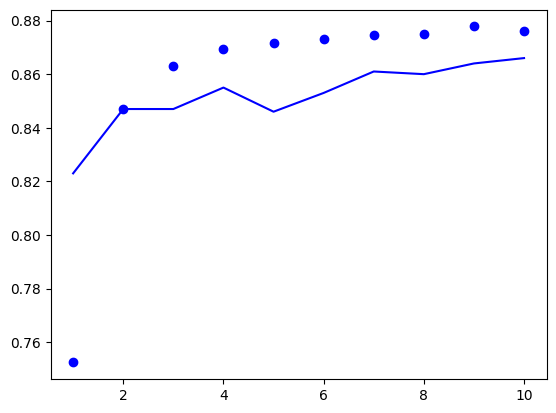

In [65]:
plt.clf()
plt.plot(epochs, acc, 'bo', label="train accuracy")
plt.plot(epochs, val_acc, 'b', label='validation accuracy')

plt.show()